### Postać rozwiązania

Nasze rozwiązanie będzie miało postać wektorów wierzchołków grafu ułożonych w kolejności odwiedzania przypisanych do poszczególnych dronów:<br>

<center>
$d_{1}=(1,3,5...)$<br>
$d_{2}=(2,7,9...)$<br>
&emsp;&emsp;.<br>
&emsp;&emsp;.<br>
&emsp;&emsp;.<br>
$d_{M}=(10,15,4...)$<br>
   </center>
M - ilość wymaganych dronów

### Funkcja celu

\begin{equation*}
F=min (\sum \limits _{v=1} ^{M} \sum \limits _{i=0} ^{N} \sum \limits _{j=0} ^{N} c_{ij} x_{vij} + \alpha (M-D))
\end{equation*}

gdzie:
<ul>
    <li>$M$ – liczba dronów
    <li>$N$ – liczba odbiorców
    <li>$c_{ij}$ – koszt(czas) przejazdu od odbiorcy $i$ do odbiorcy $j$
    <li>$x_vij$ – zmienna decyzyjna która określa czy dron $v$ wykonuje trase od $i$ do $j$
    <li>$x_{vij} = \left\{
            \begin{array}{ll}
                1 & \mbox{gdy realizowany jest kurs od i do j przez drona v}\\
                0 & \mbox{w przeciwnym przypadku}
            \end{array}
        \right. 
        $
    <li>$\alpha$ – Współczynnik kary
    <li>$D$ – Liczba dronów w posiadaniu 
</ul>                  

### Ograniczenia
Jeśli $ x_{vij} = 1 \Rightarrow  u_{i} + q_{vj} = u_{j}$</br>

<center>$ q_{vi} \leq u_{i} \leq Q \quad \forall_{i} \in_{1, 2,..., N} $</center>

<!-- \begin{equation*}
\sum \limits _{v=1} ^{M} \sum \limits _{i=0} ^{N} y_{iv} \leq Q
\end{equation*}
\begin{equation*}
\sum \limits _{i=0} ^{N} y_{iv} \leq Q \quad }
\end{equation*}
 -->
$ q_{vi} $ – wielkość zapotrzebowania dostarczana do $i$-tego klienta przez $v$-tego drona

$Q $ – ładowność drona


### Struktury danych potrzebnych do algorytmu

> Macierz dystansów od poszczególnych odbiorców

\begin{equation*}
M_{i,j} = 
\begin{pmatrix}
d_{1,1} & d_{1,2} & \cdots & d_{1,n} \\
d_{2,1} & d_{2,2} & \cdots & d_{2,n} \\
\vdots  & \vdots  & \ddots & \vdots  \\
d_{i,1} & d_{i,2} & \cdots & d_{i,j} 
\end{pmatrix}
\end{equation*}

gdzie:
<ul>
    <li>$i, j$ - identyfikatory poszczególnych odbiorców</li>
    <li>$d_{i,j}$ - dystans pomiędzy odbiorcami $i, j$</li>
    <li>dystans - odległość euklidesowa $d_{i,j} = \sqrt{(x_{i}-x_{j})^{2}+(y_{i}-y_{j})^{2}}$
</ul>

> Lista położenia poszczególnych odbiorców

<center>$ L_{i} = a_{1}, a_{2},... a_{i} $</center>

gdzie:
<ul>
    <li>$a_{i}$ - koordynaty $i - tego$ odbiorcy $(x_{i}, y_{i})$</li>
</ul>


> Ilość dronów - M

> Ładowność drona - Q

> Ilość odbiorców - N




<h2>Imports</h2>

In [9]:
from tabu_search import TabuSearch
from visualization import WithVisualization
from matplotlib import pyplot as plt
import numpy as np

<h2>Testing algorithm parameters</h2>

In [10]:
# Constants - change for testing
MAX_COST = 99999
MIN_TABU_SIZE = 50
MAX_TABU_SIZE = 80
TABU_STEP = 10
NUM_OF_TESTS = 3
N_ITERS = 1000
FILE_NAME = "test_data.txt"
NUM_DRONES = 7
DRONE_CAPACITY = 4
NUM_CLIENTS = 28

# Structures for storing history
best_of_all = MAX_COST
size = MIN_TABU_SIZE
costs_history = []
best_costs_history = []
tabu_size_average_costs = {}
best_model_result = None

# Main loop for testing parameters
while size <= MAX_TABU_SIZE:
    for _ in range(NUM_OF_TESTS):
        ts = TabuSearch(NUM_DRONES, DRONE_CAPACITY, NUM_CLIENTS, FILE_NAME)
        ts.search(tabu_size=size, n_iters=N_ITERS)
        best_cost = ts._fitness(ts.best_solution)
        print(f'Tabu size: {size}, Best_cost: {best_cost}')
        best_costs_history.append(ts.best_costs)
        costs_history.append(ts.costs)
        if best_cost < best_of_all:
            best_of_all = best_cost
            best_model_result = ts
    hist_arr = np.array(costs_history)
    tabu_size_average_costs[size] = hist_arr.mean()
    fitness_history = []
    print('=========================')
    print(f'Average: {tabu_size_average_costs[size]}')
    print(f'Best: {hist_arr.min()}\n')
    size += TABU_STEP

Elapsed time 0.7636399269104004 s
Tabu size: 50, Best_cost: 438.5652349250803
Elapsed time 0.7460050582885742 s
Tabu size: 50, Best_cost: 438.60192692849535
Elapsed time 0.7629842758178711 s
Tabu size: 50, Best_cost: 439.0930003746421
Average: 454.73318934603213
Best: 438.5652349250803

Elapsed time 0.7455258369445801 s
Tabu size: 60, Best_cost: 438.8151511778034
Elapsed time 0.7541728019714355 s
Tabu size: 60, Best_cost: 438.56523492508023
Elapsed time 0.7802374362945557 s
Tabu size: 60, Best_cost: 443.75779753539837
Average: 457.96662517898375
Best: 438.56523492508023

Elapsed time 0.7465436458587646 s
Tabu size: 70, Best_cost: 438.81515117780333
Elapsed time 0.7548825740814209 s
Tabu size: 70, Best_cost: 439.2917125739806
Elapsed time 0.7901809215545654 s
Tabu size: 70, Best_cost: 438.56523492508023
Average: 458.97104184023635
Best: 438.56523492508023

Elapsed time 0.797173261642456 s
Tabu size: 80, Best_cost: 438.60192692849535
Elapsed time 0.8114783763885498 s
Tabu size: 80, Best_

In [11]:
# Run this if figure outside of notebook
%matplotlib inline

<h2>Ploting test results</h2>

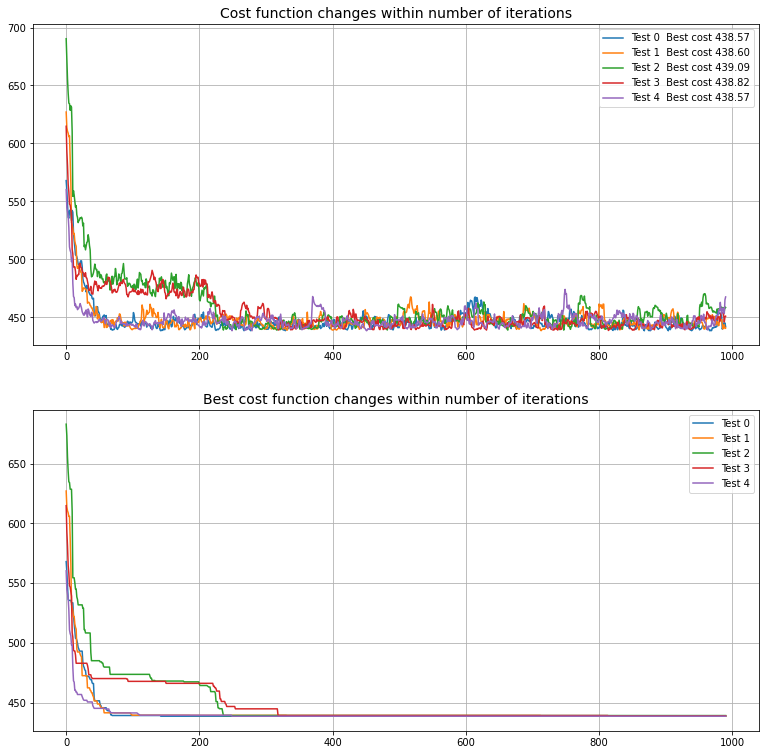

In [12]:
# Plot cost function history for each test
# NOTE: number of test is reduced by slicing 
#       for better illustration
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 13))
for i, (c, b) in enumerate(zip(costs_history[0:5], best_costs_history[0:5])):
    ax1.plot(c[10:], label=f'Test {i}  Best cost {min(b):.2f}')
    ax2.plot(b[10:], label=f'Test {i}')
ax2.legend(), ax1.legend()
ax1.grid(), ax2.grid()
ax1.set_title("Cost function changes within number of iterations", fontdict={'fontsize': 14})
ax2.set_title("Best cost function changes within number of iterations", fontdict={'fontsize': 14})
plt.show()

<h2>Ploting best result</h2>

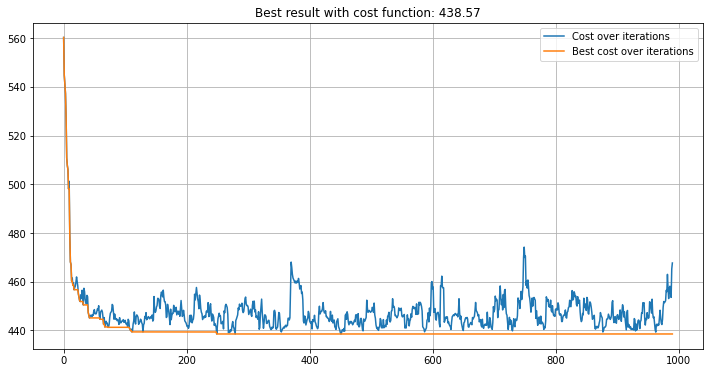

In [13]:
# Plot best solution cost history
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(best_model_result.costs[10:], label="Cost over iterations")
ax.plot(best_model_result.best_costs[10:], label="Best cost over iterations")
ax.set_title(f"Best result with cost function: {best_of_all:.2f}")
ax.legend()
plt.grid()
plt.show()

## Visualization of best solution

{(Drone 1, Capicity: 4): [Client 0 (0, 0), Client 9 (6, -1), Client 3 (16, -21), Client 1 (9, -19), Client 11 (5, -18), Client 0 (0, 0)], (Drone 2, Capicity: 4): [Client 0 (0, 0), Client 25 (-6, -25), Client 23 (-7, -25), Client 17 (-10, -23), Client 4 (-9, -21), Client 0 (0, 0)], (Drone 3, Capicity: 4): [Client 0 (0, 0), Client 19 (-2, -1), Client 10 (-6, -6), Client 13 (-1, -24), Client 7 (1, -25), Client 0 (0, 0)], (Drone 4, Capicity: 4): [Client 0 (0, 0), Client 12 (-3, 6), Client 16 (-15, 21), Client 18 (-17, 25), Client 2 (-7, 24), Client 0 (0, 0)], (Drone 5, Capicity: 4): [Client 0 (0, 0), Client 15 (19, 4), Client 26 (25, 11), Client 24 (24, 20), Client 14 (6, 12), Client 0 (0, 0)], (Drone 6, Capicity: 4): [Client 0 (0, 0), Client 5 (-23, -12), Client 6 (-22, -22), Client 8 (-20, -16), Client 20 (-11, -9), Client 0 (0, 0)], (Drone 7, Capicity: 4): [Client 0 (0, 0), Client 28 (-23, 15), Client 21 (-23, 18), Client 22 (-24, 21), Client 27 (-10, 12), Client 0 (0, 0)]}


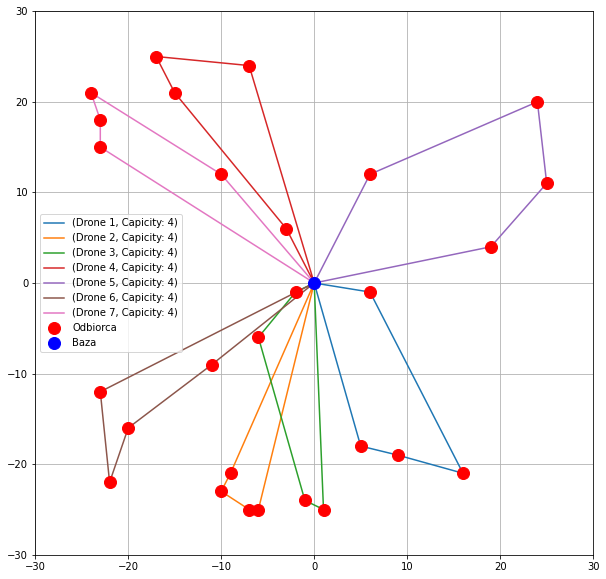

In [14]:
vis = WithVisualization(best_model_result)
vis.plot_figure(sizes=(10, 10))
vis.plot_solution()

In [15]:
# Run this if figure outside of nobebook
# necessary for live visualization
%matplotlib qt

## Live visualization

In [ ]:
vis = WithVisualization(best_model_result)
ax = vis.visualize_solution()

{(Drone 1, Capicity: 4): [Client 0 (0, 0), Client 9 (6, -1), Client 3 (16, -21), Client 1 (9, -19), Client 11 (5, -18), Client 0 (0, 0)], (Drone 2, Capicity: 4): [Client 0 (0, 0), Client 25 (-6, -25), Client 23 (-7, -25), Client 17 (-10, -23), Client 4 (-9, -21), Client 0 (0, 0)], (Drone 3, Capicity: 4): [Client 0 (0, 0), Client 19 (-2, -1), Client 10 (-6, -6), Client 13 (-1, -24), Client 7 (1, -25), Client 0 (0, 0)], (Drone 4, Capicity: 4): [Client 0 (0, 0), Client 12 (-3, 6), Client 16 (-15, 21), Client 18 (-17, 25), Client 2 (-7, 24), Client 0 (0, 0)], (Drone 5, Capicity: 4): [Client 0 (0, 0), Client 15 (19, 4), Client 26 (25, 11), Client 24 (24, 20), Client 14 (6, 12), Client 0 (0, 0)], (Drone 6, Capicity: 4): [Client 0 (0, 0), Client 5 (-23, -12), Client 6 (-22, -22), Client 8 (-20, -16), Client 20 (-11, -9), Client 0 (0, 0)], (Drone 7, Capicity: 4): [Client 0 (0, 0), Client 28 (-23, 15), Client 21 (-23, 18), Client 22 (-24, 21), Client 27 (-10, 12), Client 0 (0, 0)]}
